# Pandas 연습문제 page39~41
- 1) Iris - sns.load_dataset('iris') 
<pre>
a. 붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width), 꽃받침길이(petal_length), 
꽃받침폭(petal_width)의 평균, 표준편차 등 기초통계량(describe())을 구하시오.

b. 3분위수(Q3)와 1분위수(Q1)의 차이보다 1.5배가 크거나 작은 데이터는 이상치이다. 
즉, 
Q1 - 1.5 * (Q3 - Q1) 보다 작은 데이터 
Q3 + 1.5 * (Q3 - Q1) 보다 큰 데이터
이 이상치를 제거하고 위의 4가지 항목에 대해서 평균, 표준편차를 구하시오.
</pre>

In [71]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### 1. Iris

In [72]:
import seaborn as sns
Iris = sns.load_dataset('iris')

In [73]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
# Answer a.
setosa = Iris[Iris.species == 'setosa']
setosa = Iris[Iris.species == 'versicolor']
setosa = Iris[Iris.species == 'virginica']

setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [75]:
Iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [76]:
for species in Iris.species.unique():
    print(species, "===============================================")
    print(Iris[Iris.species == species].describe())
    print()

setosa ===============================================
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor ===============================================
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.00000

In [77]:
# a.
for specie in Iris.species.unique():   # 종류: 'setosa', 'versicolor', 'virginica'; type: array
    print(Iris[Iris.species == specie].describe())

       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.

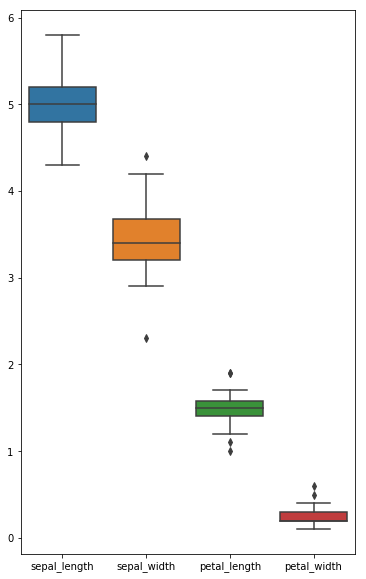

In [78]:
# Answer b. 이상치(Outlier 제거)
plt.figure(figsize=(6, 10))            # 그림화면 크게 하기
sns.boxplot(data = Iris[Iris.species == 'setosa'])
plt.show()

In [79]:
s = Iris[Iris.species == 'setosa']['sepal_width']
q1 = s.quantile(0.25)               #pandas
q3 = np.percentile(s.values, 75)    #numpy
iqr = q3 - q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [80]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
s[s < lower_limit] = np.nan
s[s > upper_limit] = np.nan

In [81]:
s.isna().sum()

2

In [82]:
s.mean(), s.std()

(3.4312500000000004, 0.32034306743094015)

In [83]:
# 함수로 만들어보기.
def get_new_stat(s):   
    q1 = s.quantile(0.25)               #pandas
    q3 = np.percentile(s.values, 75)    #numpy
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    s[s < lower_limit] = np.nan
    s[s > upper_limit] = np.nan
    return s.mean(), s.std()

In [84]:
get_new_stat(Iris[Iris.species == 'setosa']['sepal_width'])

(3.4312500000000004, 0.32034306743094015)

<pre>Code Refactoring (코드 단순화)</pre>

In [111]:
# 함수로 만들어보기.
def get_new_stat(s):   
    q1, q3= s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    s[s < lower_limit] = np.nan
    s[s > upper_limit] = np.nan
    return s.isna().sum(), s.mean(), s.std()

In [112]:
get_new_stat(Iris[Iris.species == 'setosa']['sepal_width'])

(2, 3.4312500000000004, 0.32034306743094015)

<pre>12가지 항목</pre>

In [101]:
Iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [103]:
for species in Iris.species.unique():
    for feature in Iris.columns[:-1]:
        s = Iris[Iris.species == species][feature]
        _, new_mean, new_std = get_new_stat(s)
        print(species, feature, new_mean, new_std)

setosa sepal_length 5.005999999999999 0.3524896872134512
setosa sepal_width 3.4312500000000004 0.32034306743094015
setosa petal_length 1.4608695652173913 0.12906201931985212
setosa petal_width 0.23333333333333328 0.08588298157855664
versicolor sepal_length 5.936 0.5161711470638635
versicolor sepal_width 2.7700000000000005 0.3137983233784114
versicolor petal_length 4.285714285714285 0.4377975178854565
versicolor petal_width 1.3259999999999998 0.197752680004544
virginica sepal_length 6.6224489795918355 0.593459246748267
virginica sepal_width 2.95531914893617 0.26027452951125174
virginica petal_length 5.552 0.5518946956639835
virginica petal_width 2.026 0.27465005563666733


<pre> 결과를 데이터 프레임으로 만들기
species, feature, old_mean, old_std, outlier 갯수, new_mean, new_std
</pre>

In [104]:
line = []
for species in Iris.species.unique():
    for feature in Iris.columns[:-1]:
        s = Iris[Iris.species == species][feature]
        old_mean, old_std = s.mean(), s.std()
        outlier, new_mean, new_std = get_new_stat(s)
        d = {'species': species, 'feature': feature, 'old_mean':old_mean, 'old_std': old_std,
             'outlier갯수':outlier, 'new_mean':round(new_mean,3), 'new_std':new_std}
        line.append(d)
df = pd.DataFrame(line)
df

,feature,new_mean,new_std,old_mean,old_std,outlier갯수,species
0,sepal_length,5.006,0.352490,5.006,0.352490,0,setosa
1,sepal_width,3.431,0.320343,3.428,0.379064,2,setosa
2,petal_length,1.461,0.129062,1.462,0.173664,4,setosa
3,petal_width,0.233,0.085883,0.246,0.105386,2,setosa
4,sepal_length,5.936,0.516171,5.936,0.516171,0,versicolor
5,sepal_width,2.770,0.313798,2.770,0.313798,0,versicolor
6,petal_length,4.286,0.437798,4.260,0.469911,1,versicolor
7,petal_width,1.326,0.197753,1.326,0.197753,0,versicolor
8,sepal_length,6.622,0.593459,6.588,0.635880,1,virginica
9,sepal_width,2.955,0.260275,2.974,0.322497,3,virginica


In [105]:
# 다중 인덱스
df.set_index(['species', 'feature'], inplace=True)
df

new_mean   new_std  old_mean   old_std  outlier갯수
species    feature                                                        
setosa     sepal_length     5.006  0.352490     5.006  0.352490          0
           sepal_width      3.431  0.320343     3.428  0.379064          2
           petal_length     1.461  0.129062     1.462  0.173664          4
           petal_width      0.233  0.085883     0.246  0.105386          2
versicolor sepal_length     5.936  0.516171     5.936  0.516171          0
           sepal_width      2.770  0.313798     2.770  0.313798          0
           petal_length     4.286  0.437798     4.260  0.469911          1
           petal_width      1.326  0.197753     1.326  0.197753          0
virginica  sepal_length     6.622  0.593459     6.588  0.635880          1
           sepal_width      2.955  0.260275     2.974  0.322497          3
           petal_length     5.552  0.551895     5.552  0.551895          0
           petal_width      2.026  0.274650     2.026  0.274650          0

In [106]:
df.loc['setosa']

,new_mean,new_std,old_mean,old_std,outlier갯수
feature,,,,,
sepal_length,5.006,0.352490,5.006,0.352490,0
sepal_width,3.431,0.320343,3.428,0.379064,2
petal_length,1.461,0.129062,1.462,0.173664,4
petal_width,0.233,0.085883,0.246,0.105386,2


In [108]:
df.loc[[('setosa', 'sepal_width')]]

,,new_mean,new_std,old_mean,old_std,outlier갯수
species,feature,,,,,
setosa,sepal_width,3.431,0.320343,3.428,0.379064,2


In [ ]:
for specie in Iris.species.unique():
    print('============', specie, '============')
    for i in range(4):
        print(Iris.columns[i], ': ', end=' ')
        s = Iris[Iris.species == specie][Iris.columns[i]]
        q1 = s.quantile(0.25)               #pandas
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        s[s < lower_limit] = np.nan
        s[s > upper_limit] = np.nan
        print(f'평균: {s.mean()}, 표준편차: {s.std()}')

============ setosa ============
sepal_length :  평균: 5.005999999999999, 표준편차: 0.3524896872134512
sepal_width :  평균: 3.4312500000000004, 표준편차: 0.32034306743094015
petal_length :  평균: 1.4608695652173913, 표준편차: 0.12906201931985212
petal_width :  평균: 0.23333333333333328, 표준편차: 0.08588298157855664
============ versicolor ============
sepal_length :  평균: 5.936, 표준편차: 0.5161711470638635
sepal_width :  평균: 2.7700000000000005, 표준편차: 0.3137983233784114
petal_length :  평균: 4.285714285714285, 표준편차: 0.4377975178854565
petal_width :  평균: 1.3259999999999998, 표준편차: 0.197752680004544
============ virginica ============
sepal_length :  평균: 6.6224489795918355, 표준편차: 0.593459246748267
sepal_width :  평균: 2.95531914893617, 표준편차: 0.26027452951125174
petal_length :  평균: 5.552, 표준편차: 0.5518946956639835
petal_width :  평균: 2.026, 표준편차: 0.27465005563666733


In [ ]:
# b.
Iris = sns.load_dataset('iris')
normal_Iris = Iris
columns = normal_Iris.drop(columns=['species']).columns
for column in columns:    # colums: 	sepal_length, sepal_width, petal_length, petal_width
    quarter1 = normal_Iris.quantile(0.25)[column]
    quarter3 = normal_Iris.quantile(0.75)[column]
    differ = (quarter3 - quarter1) * 1.5
    normal_Iris = normal_Iris[quarter1 - differ <= normal_Iris[column]] 
    normal_Iris = normal_Iris[normal_Iris[column] <= quarter3 + differ]
print(normal_Iris.mean())
print(normal_Iris.std())

sepal_length    5.856849
sepal_width     3.040411
petal_length    3.806849
petal_width     1.220548
dtype: float64
sepal_length    0.834093
sepal_width     0.397853
petal_length    1.758042
petal_width     0.759393
dtype: float64


- 3) Mile Per Gallon - sns.load_dataset('mpg')
<pre>
a. 배기량(displacement) 대비 마력(horsepower) 열(hp_per_cc)을 추가하시오.

b. name으로부터 manufacturer(제조사)와 모델을 추출하여
새로운 열 manufacturer와 model을 추가하고, name 열은 삭제하시오.

c. 엔진의 실린더(cylinders) 갯수별 연비(mpg)의 평균을 구하시오.

d. 생산지(origin)별 배기량 대비 마력(hp_per_cc)의 평균을 구하시오.

e. 모델이 5개 이상인 제조사에 대하여
연비(mpg)의 평균이 가장 좋은 제조사 Top 5를 구하시오.
</pre>

In [113]:
import seaborn as sns
mpg = sns.load_dataset('mpg')

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [116]:
# a. = # Answer a.
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576


In [122]:
mpg.name.describe()

count            398
unique           305
top       ford pinto
freq               6
Name: name, dtype: object

In [124]:
# Answer b.
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
mpg['model'] = mpg.name.apply(lambda x: ' '.join(x.split()[1:]))
mpg.drop(columns=['name'], inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


In [ ]:
# b.
# name으로부터 제조사 추출
m_m = mpg.name.str.split().tolist()
m_list = []
for manu in m_m:
    m_list.append(manu[0])
mpg['manufacturer'] = m_list

In [ ]:
# name으로부터 모델 추출
m_list.clear()
for manu in m_m:
    m_list.append(' '.join(manu[1:]))
mpg['model'] = m_list

In [ ]:
# mpg에서 name 칼럼 삭제
mpg.drop(columns=['name'], inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


In [ ]:
# c.
mpg.cylinders.unique()      # 연비 종류

array([8, 4, 6, 3, 5], dtype=int64)

In [ ]:
for i in range(3, 9):
    if i == 7:
        continue
    m = mpg[mpg.cylinders == i].mpg.mean()
    print(f'실린더 {i}는 연비 평균이 {m:.2f} 입니다.', )

실린더 3는 연비 평균이 20.55 입니다.
실린더 4는 연비 평균이 29.29 입니다.
실린더 5는 연비 평균이 27.37 입니다.
실린더 6는 연비 평균이 19.99 입니다.
실린더 8는 연비 평균이 14.96 입니다.


In [ ]:
# d.
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
for i in mpg.origin.unique():
    p = mpg[mpg.origin == i].horsepower.mean()
    print(f'{i}의 평균 마력: {p:.2f}')

usa의 평균 마력: 119.05
japan의 평균 마력: 79.84
europe의 평균 마력: 80.56


In [ ]:
# e.
_mpg = mpg
manu_dictionary = _mpg.manufacturer.value_counts()      # renault 위로 브랜드가 5개 이상이라는 것을 알 수 있다.

In [ ]:
# type(manu_dictionary) 을 통해 manu_dictionary가 Series라는 것을 알 수 있다.
model_mean = {}
for key, value in manu_dictionary.items():
    if value >= 5:      # model 5개 이상인 제조사
        model_mean[key] = mpg[mpg.manufacturer.str.contains(key)].mpg.mean()
sorted_model =  sorted(model_mean.items(), key = lambda item: item[1], reverse = True)  # value값으로 내림차순
for i in range(5):
    a, b = sorted_model[i]
    print(a)

vw
honda
renault
datsun
mazda
